In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy import optimize
import sys

sys.path.insert(1, '../src')
from plant import Plant
import utils
from optimization1 import *

True
21.748093560879155


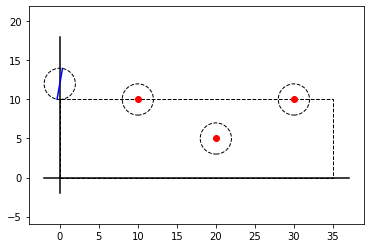

In [3]:
hypo_plant = utils.load("../data/plants/tiny-plant.json")

basic_layout = np.array([[10, 10], [20, 5], [30, 10]])

plant = Plant(hypo_plant, basic_layout)

## check result:
print(plant.valid_layout)
print(utils.get_energy(plant))
plant.draw()

In [4]:
def f(x):
    plant.layout = x.reshape((3, 2))
    plant.set_layout()
    return -utils.get_energy(plant)

In [5]:
x0 = basic_layout.flatten()
x0

array([10, 10, 20,  5, 30, 10])

In [6]:
f(x0)

-21.748093560879155

In [7]:
bounds = []
for i in range(3):
    bounds.append((0, 35))
    bounds.append((0, 10))
bounds

[(0, 35), (0, 10), (0, 35), (0, 10), (0, 35), (0, 10)]

In [8]:
def g01(x):
    i, j = 0, 1
    layout = x.reshape(3, 2)
    distance = np.linalg.norm(layout[i] - layout[j])
    return distance - 4

def g02(x):
    i, j = 0, 2
    layout = x.reshape(3, 2)
    distance = np.linalg.norm(layout[i] - layout[j])
    return distance - 4

def g12(x):
    i, j = 1, 2
    layout = x.reshape(3, 2)
    distance = np.linalg.norm(layout[i] - layout[j])
    return distance - 4

## TODO: auto generate (n choose 2) constraints
# constraints = []
# for i in range n:
#   for j in range i+1, n:
#       constraints.append({ lambda x: g(i,j) })

constraints = [{"type": "ineq", "fun": g01},
               {"type": "ineq", "fun": g02},
               {"type": "ineq", "fun": g12}]

In [9]:
result = optimize.minimize(f, x0, 
                           method="SLSQP", 
                           bounds=bounds,
                           constraints=constraints,
                           options={'disp': True, 'maxiter': 100})

Optimization terminated successfully    (Exit mode 0)
            Current function value: -41.033956692960274
            Iterations: 28
            Function evaluations: 317
            Gradient evaluations: 28


[ 7.86264511  3.60361985 20.          5.         30.         10.        ]
     fun: -41.033956692960274
     jac: array([ 0.52402258,  0.48407221,  0.        ,  0.        ,  0.        ,
       -0.        ])
 message: 'Optimization terminated successfully'
    nfev: 317
     nit: 28
    njev: 28
  status: 0
 success: True
       x: array([ 7.86264511,  3.60361985, 20.        ,  5.        , 30.        ,
       10.        ])
True
41.033956692960274


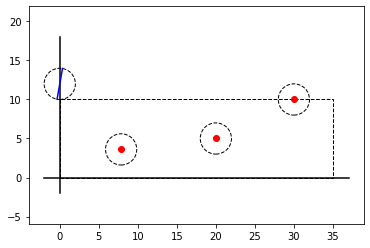

In [10]:
print(result["x"])
print(result)

plant.layout = result['x'].reshape((3, 2))
plant.set_layout()
print(plant.valid_layout)
print(utils.get_energy(plant))
plant.draw()